# Imports

In [20]:
import pandas as pd
import numpy as np
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

# Importing data
training_data = pd.read_csv("./segmentation/segmentation.Train.csv");
testing_data = pd.read_csv("./segmentation/segmentation.test.csv");


# Distance Calculator Functions

In [21]:
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

def cos_sim(p1, p2):
    dot_product = np.dot(p1, p2) # x.y
    norm_p1 = np.linalg.norm(p1) #|x|
    norm_p2 = np.linalg.norm(p2) #|y|
    return (1 - (dot_product / (norm_p1 * norm_p2)))

# Main Function 

In [22]:
def predict(x_train, y , x_input, k, d_type):
    op_labels = []

    #Loop through the Datapoints to be classified
    for item in x_input: 
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances =  eucledian(np.array(x_train[j,:]) , item) if d_type == 1 else cos_sim(np.array(x_train[j,:]) , item)
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
    return op_labels

# Preparing Dataset For Training

In [23]:
#Loading the Data
[X_train, X_test] = [training_data.drop('LABEL', axis=1), testing_data.drop('LABEL', axis=1)];
[y_train, y_test] = [pd.DataFrame(training_data, columns=['LABEL']), pd.DataFrame(testing_data, columns=['LABEL'])]

labelencoder = LabelEncoder()
y_train['LABEL'] = labelencoder.fit_transform(y_train['LABEL'])
y_test['LABEL'] = labelencoder.fit_transform(y_test['LABEL'])

# Plotting Results

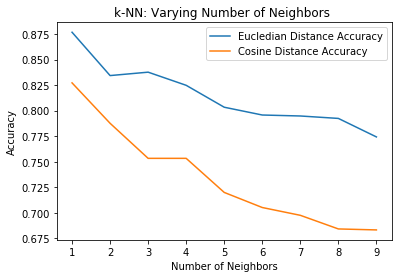

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
test_accuracy_euc = np.empty(len(neighbors))
test_accuracy_cosine = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    y_pred = predict(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), k, 1)
    test_accuracy_euc[i] = accuracy_score(y_test, y_pred)

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    y_pred = predict(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), k, 2)
    test_accuracy_cosine[i] = accuracy_score(y_test, y_pred)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors ')
plt.plot(neighbors, test_accuracy_euc, label = 'Eucledian Distance Accuracy')
plt.plot(neighbors, test_accuracy_cosine, label = 'Cosine Distance Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()